In [2]:
import pandas as pd

In [3]:
df3 = pd.read_csv("E:\\1. Sem 3\\3. Results\\5. Apr New Data\\6. Four step model_dataset\\Hdmodeldataset_4step_meanstd.csv")
df3

Bus_Stop_1  Bus_Stop_2  Bus_No_1  Bus_No_2  TT_L_1_5  TT_F_1_5  \
0              1           3       381      9526       279       244   
1              1           3      9526     20908       244       211   
2              1           3     20908     34197       211       248   
3              1           3     34197     48637       248       251   
4              1           3     48637     63874       251       267   
...          ...         ...       ...       ...       ...       ...   
2725          22          23     55212     70442       380       706   
2726          22          23     70442     85174       706       835   
2727          22          23     85174     99943       835       765   
2728          22          23     99943    114518       765       534   
2729          22          23    114518    128554       534       425   

      Dwell_Time_L1  Dwell_Time_F1  Bus_Stop_3  Bus_Stop_4  Time_Headway_1  \
0              8.46       8.950000           4           5      1186.00000   
1              8.95       8.720000           4           5      1230.00000   
2              8.72       8.120000           4           5      1187.00000   
3              8.12       8.990000           4           5      1188.00000   
4              8.99       8.710000           4           5      1207.00000   
...             ...            ...         ...         ...             ...   
2725          12.42      11.290000          29          27      1263.00000   
2726          11.29       6.310000          29          27      1121.00000   
2727           6.31       5.670000          29          27      1159.00000   
2728           5.67       4.220000          29          27      1137.00000   
2729           4.22      10.074545          29          27      1331.18182   

       ts  Time_Headway_5  mean_TH_5  std_TT_F1_5  mean_TT_F1_5  
0     ts1      1152.00000       1205        23.70           210  
1     ts1      1197.00000       1205        23.70           210  
2     ts2      1223.00000       1231        17.89           244  
3     ts3      1192.00000       1228        25.29           249  
4     ts3      1223.00000       1228        25.29           249  
...   ...             ...        ...          ...           ...  
2725  ts5      1588.00000       1180       447.90           721  
2726  ts6      1245.00000       1267       382.07           799  
2727  ts6      1089.00000       1267       382.07           799  
2728  ts7       904.70000       1002       183.37           553  
2729  ts7      1227.72727       1002       183.37           553  

[2730 rows x 16 columns]

In [4]:
df3.columns

Index(['Bus_Stop_1', 'Bus_Stop_2', 'Bus_No_1', 'Bus_No_2', 'TT_L_1_5',
       'TT_F_1_5', 'Dwell_Time_L1', 'Dwell_Time_F1', 'Bus_Stop_3',
       'Bus_Stop_4', 'Time_Headway_1', 'ts', 'Time_Headway_5', 'mean_TH_5',
       'std_TT_F1_5', 'mean_TT_F1_5'],
      dtype='object')

### KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
R-squared Score: 0.7191693850985852
Adjusted R-squared Score: 0.7144539456692705
Mean Squared Error: 6681.693612218307
Root Mean Squared Error: 81.741627168893
Mean Absolute Error: 40.91005734107932
Mean Absolute Percentage Error (MAPE) : 3.494830344849731


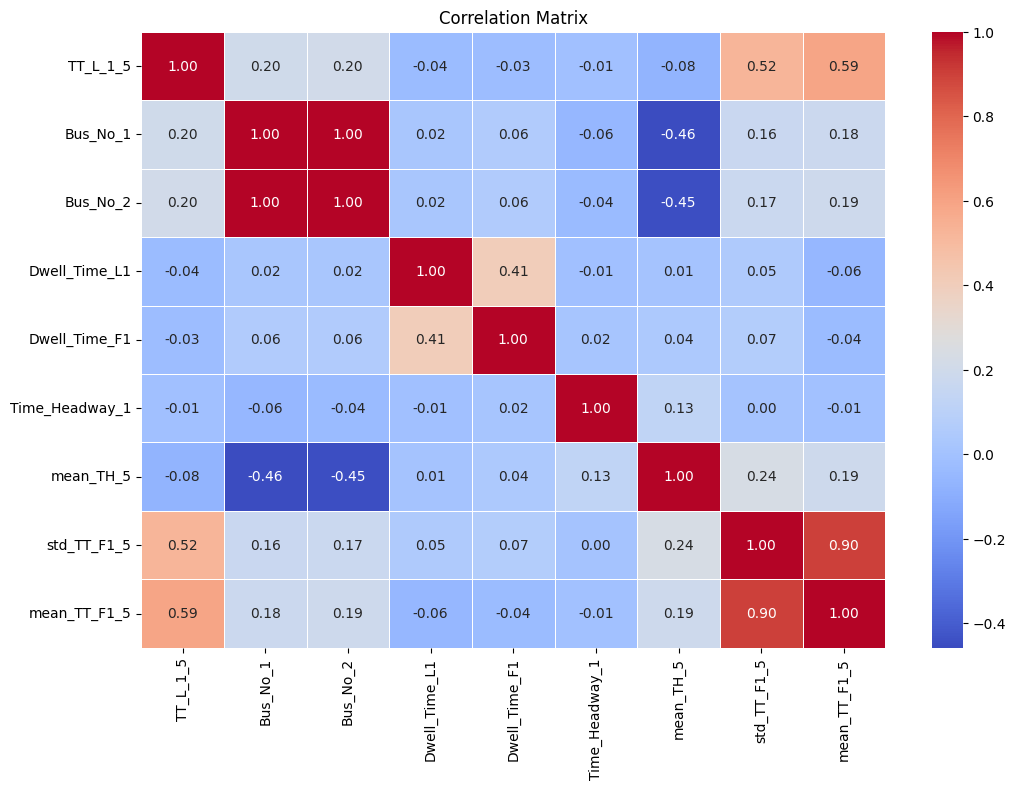

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[ 'TT_L_1_5','Bus_No_1', 'Bus_No_2',
        'Dwell_Time_L1', 'Dwell_Time_F1', 'Time_Headway_1','mean_TH_5',
       'std_TT_F1_5', 'mean_TT_F1_5' ]]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_5']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 670)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the grid search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)

# Make predictions on the test data using the best model
best_knn_regressor = grid_result.best_estimator_
Y_pred = best_knn_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Make predictions on the training data using the best model
Y_train_pred = best_knn_regressor.predict(X_train)

# Calculate Mean Absolute Percentage Error (MAPE) on training data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calculate MAPE on training data
mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)


# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### XGB

Best Parameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100}
R-squared Score: 0.6791657767671843
Adjusted R-squared Score: 0.6719424921915862
Mean Squared Error: 9726.255488981613
Root Mean Squared Error: 98.62177999296917
Mean Absolute Error: 51.893632478399724
Mean Absolute Percentage Error (MAPE) : 4.323242215024852


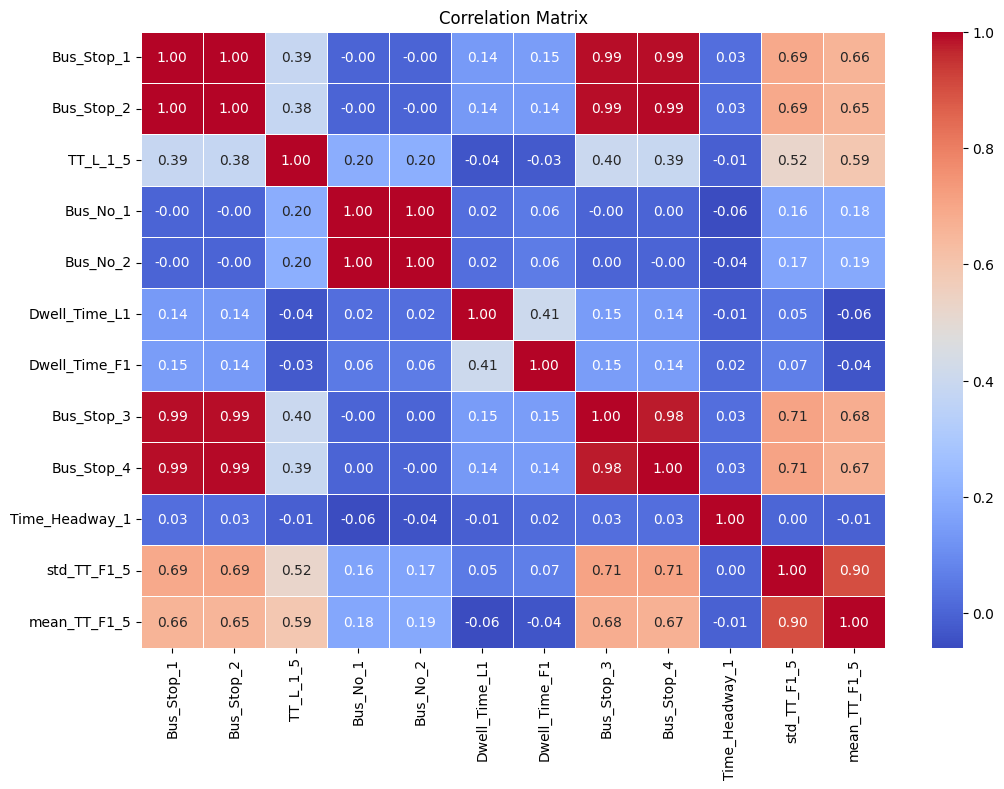

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[  'Bus_Stop_1', 'Bus_Stop_2', 'TT_L_1_5','Bus_No_1', 'Bus_No_2',
        'Dwell_Time_L1', 'Dwell_Time_F1', 'Bus_Stop_3',
       'Bus_Stop_4', 'Time_Headway_1','std_TT_F1_5', 
        'mean_TT_F1_5']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_5']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=221)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_xgb_regressor = grid_search.best_estimator_
Y_pred = best_xgb_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### LS SVM

In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[  'Bus_Stop_1', 'Bus_Stop_2',  'TT_L_1_5',
        'Dwell_Time_L1', 'Dwell_Time_F1', 'Bus_Stop_3',
       'Bus_Stop_4', 'Time_Headway_1','mean_TH_5',
       'std_TT_F1_5', 'mean_TT_F1_5' ]]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_5']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=927)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LS SVM model
model = SVR(kernel='linear')

# Define the grid search parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon insensitive loss parameter
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)

# Make predictions on the test data using the best model
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)

# Print evaluation metrics
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 100, 'epsilon': 0.2}
R-squared Score: 0.5569645345853169
Adjusted R-squared Score: 0.5503643786759734
Mean Squared Error: 11550.91815922253
Root Mean Squared Error: 107.47519787942952
Mean Absolute Error: 62.775944188764534
Mean Absolute Percentage Error (MAPE): 5.416885970293502


### Random Forest

In [ ]:
import warnings
warnings.filterwarnings("ignore")

C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
441 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
R-squared Score: 0.6565442757502702
Adjusted R-squared Score: 0.6508953329172154
Mean Squared Error: 11635.54607863943
Root Mean Squared Error: 107.86818844608187
Mean Absolute Error: 56.01806967458784
Mean Absolute Percentage Error (MAPE): 4.586350143166403


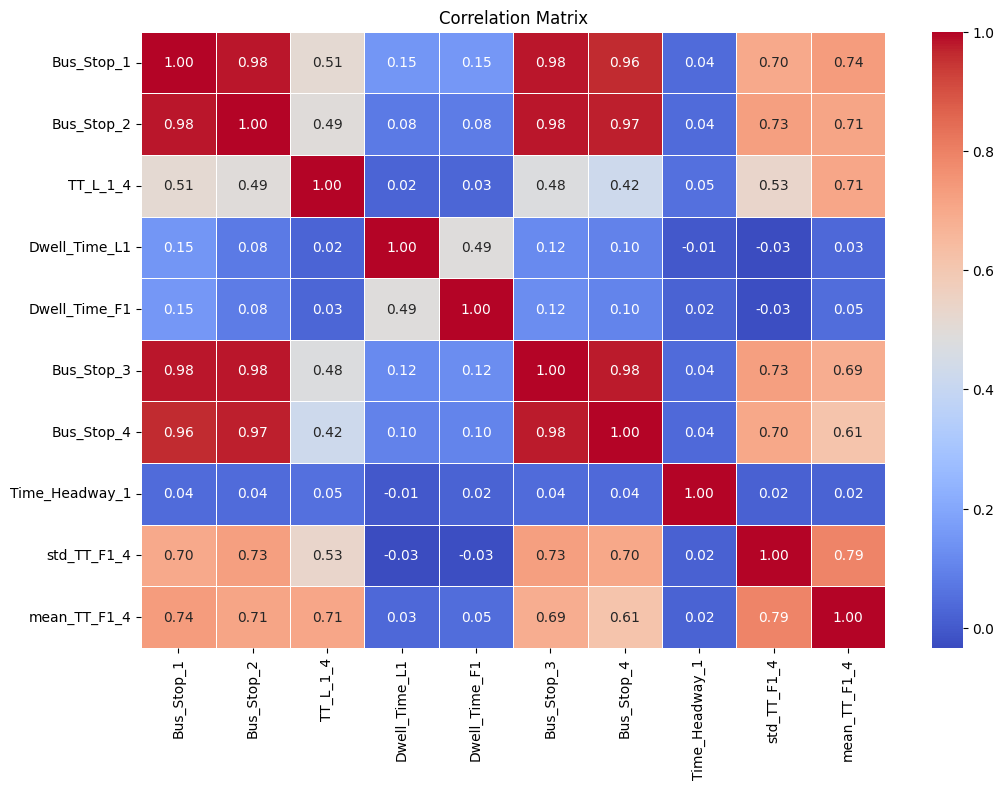

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[ 'Bus_Stop_1', 'Bus_Stop_2', 'TT_L_1_4',
       'Dwell_Time_L1', 'Dwell_Time_F1', 'Bus_Stop_3', 'Bus_Stop_4',
       'Time_Headway_1', 'std_TT_F1_4', 'mean_TT_F1_4']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_4']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=30),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)

# Print evaluation metrics
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Gradient Boosting

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Assuming your DataFrame is named df1
# Split the data into features (X) and target variable (Y)
X = df3[[  'Bus_Stop_1', 'Bus_Stop_2', 'TT_L_1_5',
        'Dwell_Time_L1', 'Dwell_Time_F1', 'Bus_Stop_3',
       'Bus_Stop_4', 'Time_Headway_1', 'mean_TH_5',
       'std_TT_F1_5', 'mean_TT_F1_5']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_5']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=94)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=94),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adj_r2 = adjusted_r2_score(Y_test, Y_pred, X_train.shape[1])
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred) # You need to define this function

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


KeyboardInterrupt: 